In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import DataProcTools.Features as ft
import DataProcTools.DataCleaning.MissingValues as mv

# Which countries won the most medals?
- we will use the data that was integrated in `Olympic_Exploration.ipynb`
- the season might be important factor, so we will need to know which is winter and which is summer, to do this we will use `athlete_events.csv` to extract the season information then integrate this with `medals_noc_integrated.csv`

## steps
- aggregate dataset by NOC and sum the metals won
- sort by the number of medals won, and look at the top 5 nations for each

### the steps can be repeated for summer and winter datasets

In [2]:
noc_medals = pd.read_csv('./data/medals_noc_integrated.csv')

games = pd.read_csv('./data/athlete_events.csv')[["Games","Year"]].drop_duplicates(subset=["Games","Year"])

noc_medals_games = noc_medals.merge(right=games,on="Year")



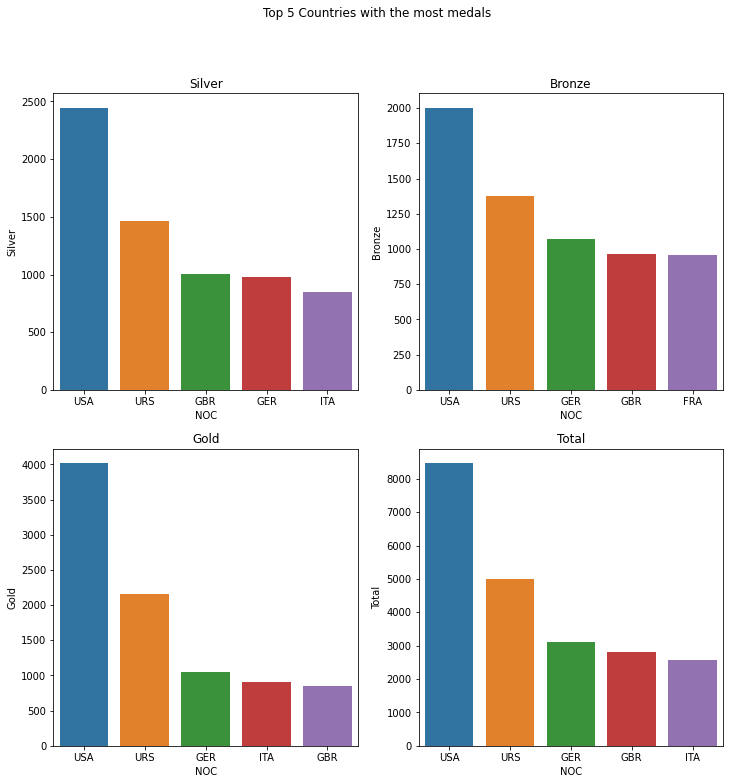

In [3]:
noc_medals_games
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes=axes.flatten()


fig.suptitle("Top 5 Countries with the most medals")

medals = ["Silver","Bronze","Gold","Total"]

for i,m in enumerate(medals):
    medals_top_5 = noc_medals_games.groupby("NOC").sum().sort_values(m,ascending=0)[:5]
    axes[i].set_title(m)
    sns.barplot(ax=axes[i],data=medals_top_5,x=medals_top_5.index,y=m)
    
    

# NOTE
## if we look closely, Soviet Union (URS) and Russia (RUS) are seen as separate nations, for historical reasons, soviet union (which russia was part of it as a region) is included

In [4]:
noc_medals_games[['NOC']].query('NOC=="URS" or NOC=="RUS"').drop_duplicates()

,NOC
36239,RUS
139449,URS


### Winter/Summer Split

In [5]:
noc_medals_games = noc_medals.merge(right=games,on="Year")
winter= noc_medals_games[noc_medals_games["Games"].str.contains("Winter")]
summer= noc_medals_games[noc_medals_games["Games"].str.contains("Summer")]

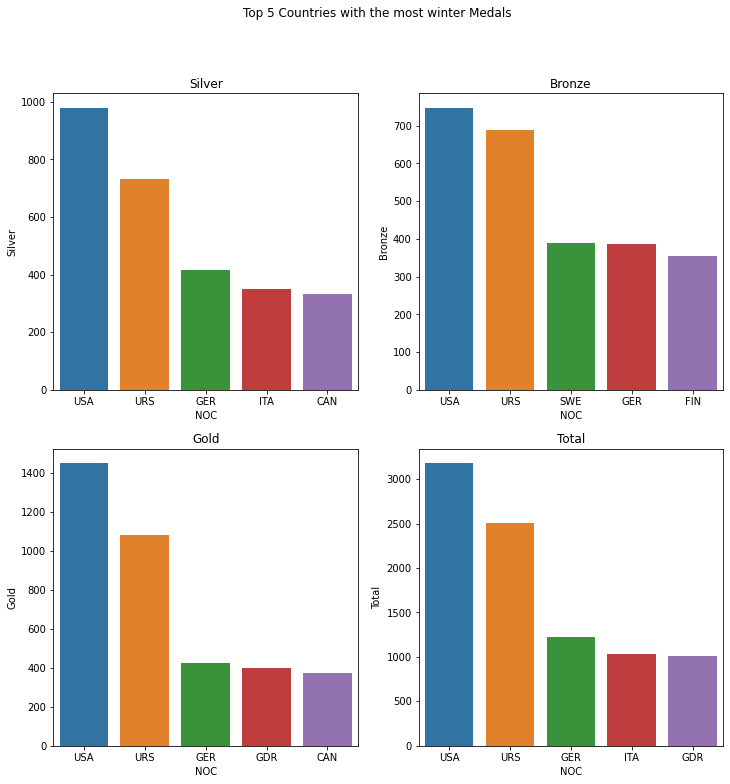

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes=axes.flatten()
fig.suptitle("Top 5 Countries with the most winter Medals")

medals = ["Silver","Bronze","Gold","Total"]

for i,m in enumerate(medals):
    medals_top_5 = winter.groupby("NOC").sum().sort_values(m,ascending=0)[:5]
    axes[i].set_title(m)
    sns.barplot(ax=axes[i],data=medals_top_5,x=medals_top_5.index,y=m)
    
    

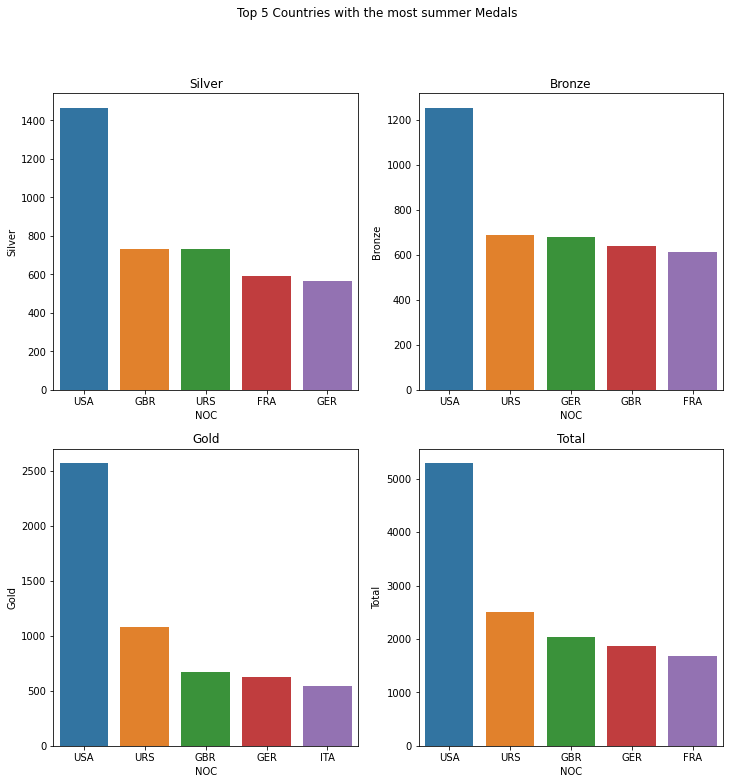

In [7]:

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes=axes.flatten()
fig.suptitle("Top 5 Countries with the most summer Medals")

medals = ["Silver","Bronze","Gold","Total"]

for i,m in enumerate(medals):
    medals_top_5 = summer.groupby("NOC").sum().sort_values(m,ascending=0)[:5]
    axes[i].set_title(m)
    sns.barplot(ax=axes[i],data=medals_top_5,x=medals_top_5.index,y=m)

The above includes all the games since the late 19th century, let's look at year 2000 and after

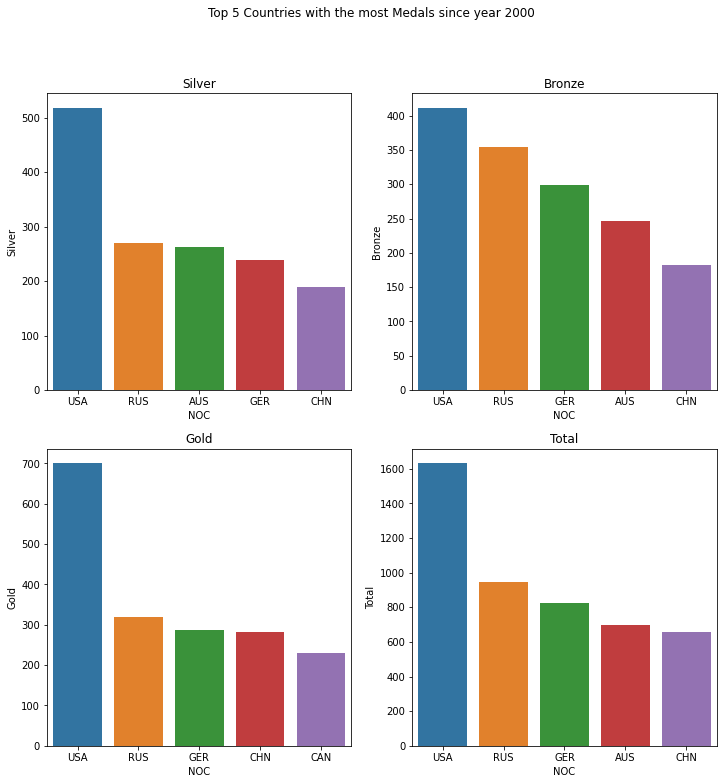

In [8]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes=axes.flatten()
fig.suptitle("Top 5 Countries with the most Medals since year 2000")
medals = ["Silver","Bronze","Gold","Total"]
for i,m in enumerate(medals):
    medals_top_5 = noc_medals_games.query('Year >= 2000').groupby("NOC").sum().sort_values(m,ascending=0)[:5]
    axes[i].set_title(m)
    sns.barplot(ax=axes[i],data=medals_top_5,x=medals_top_5.index,y=m)

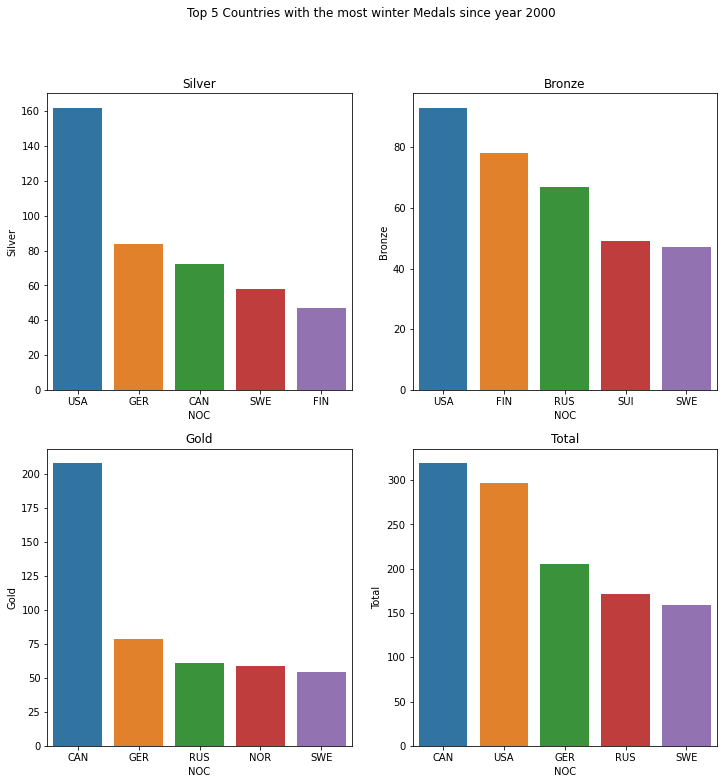

In [9]:

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes=axes.flatten()
fig.suptitle("Top 5 Countries with the most winter Medals since year 2000")
medals = ["Silver","Bronze","Gold","Total"]
for i,m in enumerate(medals):
    medals_top_5 = winter.query('Year >= 2000').groupby("NOC").sum().sort_values(m,ascending=0)[:5]
    axes[i].set_title(m)
    sns.barplot(ax=axes[i],data=medals_top_5,x=medals_top_5.index,y=m)

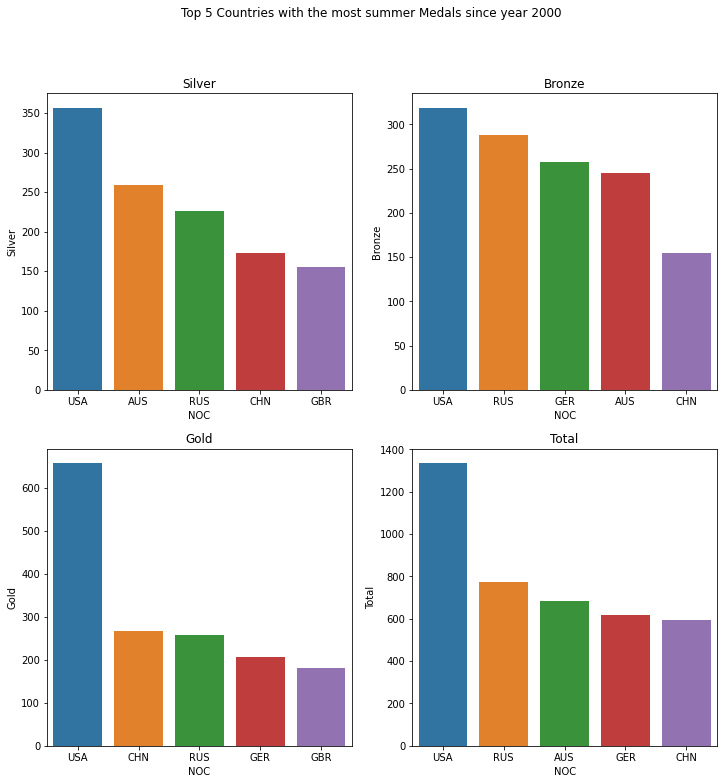

In [10]:

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes=axes.flatten()
fig.suptitle("Top 5 Countries with the most summer Medals since year 2000")
medals = ["Silver","Bronze","Gold","Total"]
for i,m in enumerate(medals):
    medals_top_5 = summer.query('Year >= 2000').groupby("NOC").sum().sort_values(m,ascending=0)[:5]
    axes[i].set_title(m)
    sns.barplot(ax=axes[i],data=medals_top_5,x=medals_top_5.index,y=m)